# Task 4 - Logistic Regression (AI & ML Internship)
# Author: Mrutyunjay Joshi

# Step 1: Import the library which we want to use in it

In [ ]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import (
        confusion_matrix,
        classification_report,
        accuracy_score,
        roc_curve,
        auc
    )
except Exception as e:
    print(e)

# Step 2: Load Dataset from the
# Dataset link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
try:
    
    df = pd.read_csv("data.csv")

    # Display dataset first five rows by head function
    print(df.head())
    # Display the shap of the dataset
    print("\nShape of Dataset:", df.shape)

    # Drop unnecessary columns from the dataset
    df = df.drop(['id', 'Unnamed: 32'], axis=1)

    # Encode target variable (M=1, B=0) from the dataset
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
except Exception as e:
    print(e)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Step 3: Split Features and Target from the dataset

In [ ]:
try:
    

    X = df.drop('diagnosis', axis=1)
    y = df['diagnosis']

    # Split data (80% training, 20% testing) for to train our model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
except Exception as e:
    print(e)

# Step 4: Standardize the Data of the dataset which we use to train our model

In [ ]:
try:
    

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
except Exception as e:
    print(e)


# Step 5: Train Logistic Regression Model from our filter data from the dataset

In [ ]:
try:
    

    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)

except Exception as e:
    print(e)


# Step 6: Make Predictions from the our train model by our filter dataset

In [ ]:
try:
    

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

except Exception as e:
    print(e)


# Step 7: Model Evaluation means how it is accurate to pridict the right answer 

In [ ]:
try:
    

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 4))
except Exception as e:
    print(e)



Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy Score: 0.9737


# Step 8: ROC-AUC Curve 

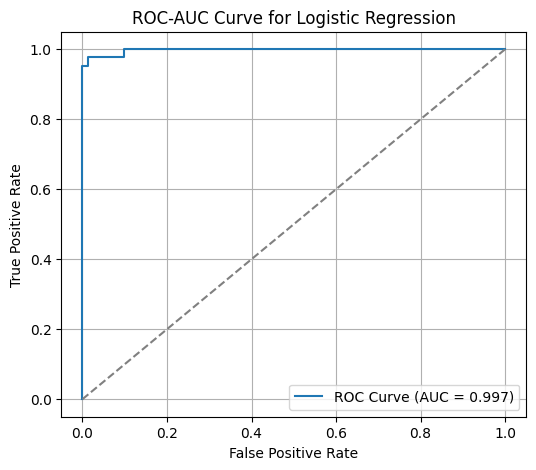

In [ ]:
try:
    

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
    plt.plot([0,1], [0,1], linestyle="--", color="gray")
    plt.title("ROC-AUC Curve for Logistic Regression")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
except Exception as e:
    print(e)


# Step 9: Visualize Sigmoid Function

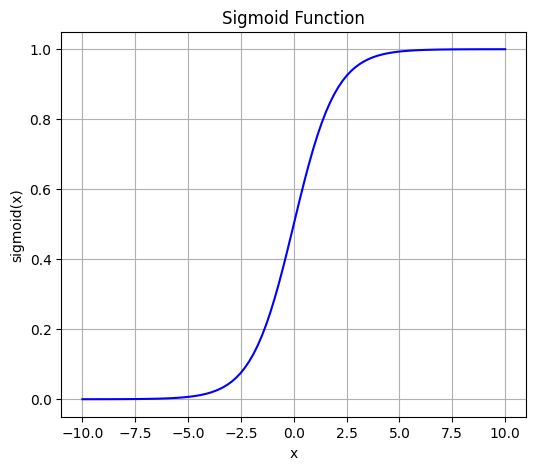

In [ ]:
try:
    

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    x_values = np.linspace(-10, 10, 100)
    y_values = sigmoid(x_values)

    plt.figure(figsize=(6,5))
    plt.plot(x_values, y_values, color='blue')
    plt.title("Sigmoid Function")
    plt.xlabel("x")
    plt.ylabel("sigmoid(x)")
    plt.grid(True)
    plt.show()
    print("Sigmoid function plotted successfully.")
except Exception as e:
    print(e)
